# Phase 1: EDA & Initial Baseline Model

* **Group members:** Joel Klein, Rakesh Jothishankar, Suriyadeepan Narayanasamy, Ashley Thornton
* **School:** Luddy School of Engineering, Indiana University
* **Course:** INFO 526: Applied Machine Learning
* **Professor:** James Shanahan, Ph. D.
* **Date:** April 20, 2021


# Abstract

Many consumers struggle receiving loan support from banks due to lacking credit history. Home Credit is a service whose goal is to provide loan opportunities for this underserved population. Failing to build and implement an accurate repayment detection method assumes major consequences. Missed financial interest unfolds if a loan is granted to consumers likely to default, Home Credit may not recoup the principal. This paper aims to address this issue by proposing a machine learning approach using Home Credit internal and external loan application and credit payment history data for automatic loan default detection. We introduce a simple and explainable logistic regression algorithm with the loan application data. Additionally, we explore more advanced machine learning and deep learning algorithms such as gradient boosting machines and neural networks to improve default classification. The results will show strong performance comparable to existing algorithms scoring near the top of the open-source Kaggle leaderboard.

# Project Description

The main project objective is to build a machine learning classification algorithm with current and existing loan application and payment history data to determine if a new Home Credit loan applicant will default on a loan. This project will abide by the Cross Industry Standard Process for Data Mining (CRISP-DM) framework to build a valuable default detection system. The CRISP-DM framework consists of six revolving sections: business understanding, data understanding, data preparation, modeling, evaluation, and deployment. Since this modeling exercise is for research purposes only, the deployment step is ignored. The first phase of the project is to complete one iteration with available data to model and evaluate a regularized logistic regression model for default detection. The following file contains the exploratory data analysis and initial baseline model for the project "Identifying Home Credit Application Default Risk". Modeling has been performed using the data extracted from [Home Credit Default Risk (HCDR)  Kaggle Competition](https://www.kaggle.com/c/home-credit-default-risk/).

<img src="../output/images/ModelProblem_CRISPDM.png"/>

# Background on Home Credit Group & the Data


## Some of the challenges

1. Dataset size 
   * (688 meg uncompressed) with millions of rows of data
   * 2.71 Gig of data uncompressed
* Dealing with missing data
* Imbalanced datasets
* Summarizing transaction data


## Back ground Home Credit Group

Many people struggle to get loans due to insufficient or non-existent credit histories. Unfortunately, this population is often taken advantage of by untrustworthy lenders.

### Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## Background on the dataset
Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

## Data files overview
There are 7 different sources of data:

* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_balance:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.
* __credit_card_balance:__ monthly balance of client's previous credit card loans in Home Credit.

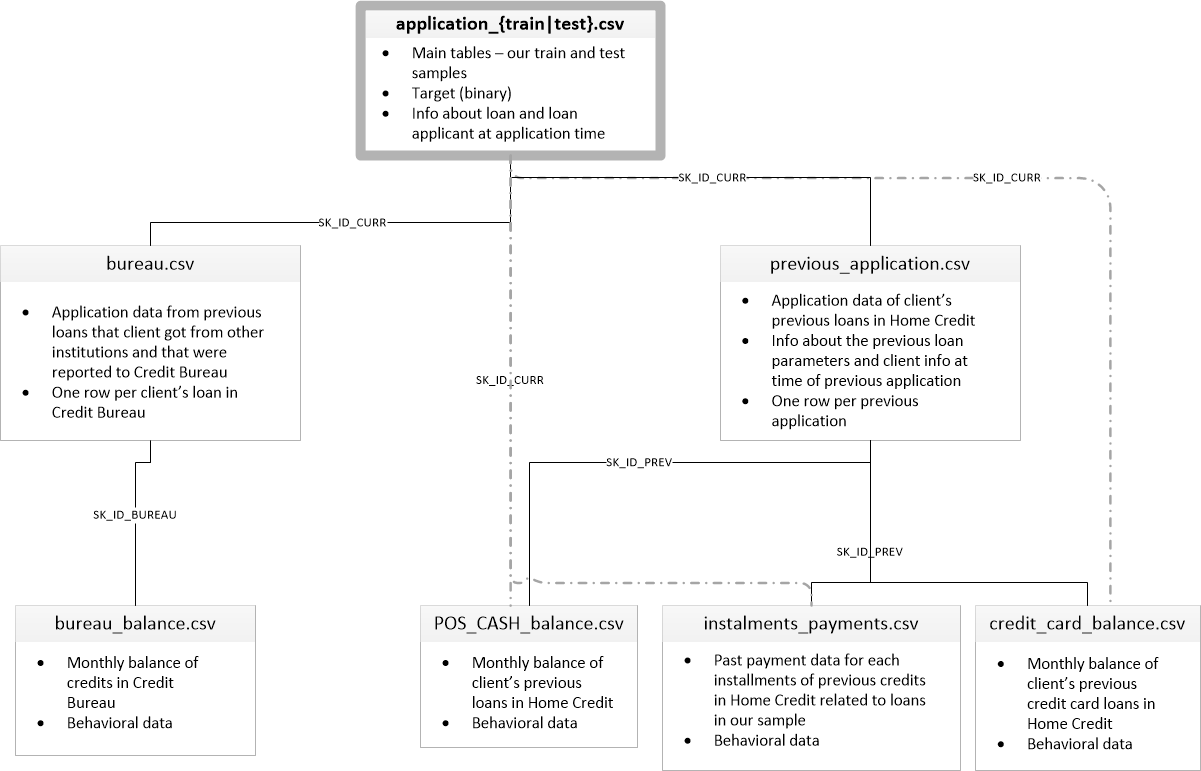

### Application train & test datasets


* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.


The application dataset has the most information about the client: Gender, income, family status, education ...

### Other datasets

**Note: The other data set will be incorporated in phase 2 modeling.**

* __bureau:__ Data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ Monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ Previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_balance:__ Monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* __credit_card_balance:__ Monthly data about previous credit card loans clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ Payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

# Modeling

## Modeling Methods

The **initial baseline** model will be fit only with the application data set to predict credit default.

**Data:**
* Loan application data

**Validation strategy:**
* Data is split such that 80% is in training data and 20% is held out in testing data
* 5 fold cross validation will be used for tuning and estimating accuracy before evaluating on test data - see tuning section below.

**Features:** 
* All numeric and categorical

**Data preprocessing:**
* Numeric features: missing features imputed with median then all numeric features are standardized
* Categorical features: missing features filled with '' then all categorical features are one hot encoded

**Tuning strategy:**
* The hyperparameter tuning will be completed using a random 10% of the training data. The hyperparameters will be chosen based on the subset generating the highest 5 fold validation area under the roc curve.

* We will use the remaining 90% of the training data to perform 5 fold cross validation with the best hyperparameters from the tuning process to gather estimates of how the model will perform on unseen data.

**Algorithms:** 
* Elastic Net Logistic Regression
* Random Forest
* XGBoost

**Experiments:** 
* Elastic Net Logistic Regression with all loan application features
* Elastic Net Logistic Regression with all loan application features and additional domain features added such as credit to income ratio
* Random Forest with all loan application features and additional domain features added such as credit to income ratio
* XGBoost with all loan application features and additional domain features added such as credit to income ratio

**Evaluation:**

* Main metric to optimize: Area under ROC curve
* Other metrics to evaluate: precision, recall, f1 score, classification accuracy, confusion matrix

## Environment configuration

### Libraries

In [124]:
# data manipulation
import numpy as np
import pandas as pd 

import os
import zipfile

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# splitting
from sklearn.model_selection import train_test_split

# preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder

# pipelines
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline

# models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# tuning
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate
from skopt import BayesSearchCV

# model evaluation
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix, plot_confusion_matrix

### Global options

In [125]:
# do not show warnings
import warnings
warnings.filterwarnings('ignore')

# set pandas display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Functions

In [126]:
# define a function for loading in dataset
def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df

In [281]:
# create a function to plot feature importances
def lr_feature_importance_plot(clf, names, n=10):
    feature_importance = abs(clf.named_steps['logistic'].coef_[0])
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    
    fig = plt.figure(figsize=(8, 6), dpi=80)
    ax = fig.add_subplot(1, 1, 1)
    ax.barh(pos[-n:], feature_importance[sorted_idx][-n:], align='center')
    ax.set_yticks(pos[-n:])
    ax.set_yticklabels(np.array(names)[sorted_idx][-n:], fontsize=8)
    ax.set_xlabel('Relative Feature Importance')
    
    plt.tight_layout()
    plt.show()
    
    print("There are",len(feature_importance[feature_importance == 0]),"features that have 0 importance.")

In [279]:
# create a function to plot feature importances for tree model
def tree_feature_importance_plot(clf, step_name, names, n=10):
    feature_importance = abs(clf.named_steps[step_name].feature_importances_)
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    
    fig = plt.figure(figsize=(8, 6), dpi=80)
    ax = fig.add_subplot(1, 1, 1)
    ax.barh(pos[-n:], feature_importance[sorted_idx][-n:], align='center')
    ax.set_yticks(pos[-n:])
    ax.set_yticklabels(np.array(names)[sorted_idx][-n:], fontsize=8)
    ax.set_xlabel('Relative Feature Importance')
    
    plt.tight_layout()
    plt.show()
    
    print("There are",len(feature_importance[feature_importance == 0]),"features that have 0 importance.")

## Data Load

In [172]:
# set the data directory
DATA_DIR = "../data/home-credit-default-risk"  # data folder will be present in the level as the code folder

# set the directory for storing model objects
MODEL_DIR = "../output/models"

# set the results folder for storing model results
REPORT_DIR = "../output/reports"

# set the results folder for storing model results
IMAGE_DIR = "../output/images"

In [128]:
datasets={}  # data will be stored in a dictionary

# set the dataset names
ds_names = ("application_train", "application_test")

# read in datasets and print first few records
for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [129]:
# print data shape
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')

dataset application_train       : [    307,511, 122]
dataset application_test        : [     48,744, 121]


### Copy of Contents in DF

In [130]:
# copy data sets into new objects
appTrainDF = datasets["application_train"]
appTestDF = datasets["application_test"]

In [131]:
# delete objects no longer needed for memory
import gc
gc.enable()
del datasets
gc.collect()

68

## Split data

In [132]:
# assign the input and response features
X = appTrainDF.drop(['SK_ID_CURR', 'TARGET'], axis = 1)
y = appTrainDF['TARGET']

In [133]:
# split data such that 80% in training and 20% in test
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=42)

In [134]:
# print the shape of the training data
x_train.shape

(246008, 120)

### Generate a smaller sample for tuning

A standard 4 Core and 16 GB RAM does not have enough compute power to train a model of this size. Thus we will do an additional split with the training data in order for performing hyperparameter tuning. <br>

The hyperparameter tuning will be completed using a random 10% of the training data. The hyperparameters will be chosen based on the subset generating the highest 5 fold validation area under the roc curve. <br>

We will use the remaining 90% of the training data to perform 5 fold cross validation with the best hyperparameters from the tuning process to gather estimates of how the model will perform on unseen data.

In [135]:
# split data such that 10% is used for tuning, other 90% used for cross fold validation with best hyperparameters
x_sample_10, x_sample_90, y_sample_10, y_sample_90 = train_test_split(x_train, y_train, stratify=y_train, test_size=.9, random_state=42)

In [136]:
x_sample_10.shape

(24600, 120)

## Pipelines

For the initial model building phase, only the features from the application data set will be inputs into the model. <br>

The data pipeline for these input features consists of four steps for the initial model building phase. There are two transformations applied to numeric features and two transformations applied to categorical features. The steps of the data preparation pipeline are listed below:

* **Step 1:** Impute missing numeric values with the median as some features are heavily skewed and the median reflects the most accurate guess at the true value for most numeric features in the data
* **Step 2:** Standardize the numeric features such that all numeric and categorical features within the dataset are of the same scale.
* **Step 3:** Impute the missing categorical features with a "Unknown" category. Missing values are assigned their own category as missing the feature may be meaningful to detecting default for some features.
* **Step 4:** One hot encode categorical features such that each category is a boolean value of 1 or zero.
* **Step 5 (optional):** Add in additional calculated bank specific features such as credit to income ratio.
* **Step 6:** Pipe the transformed data into the modeling step of the pipeline (regularized logistic regression/random forest/xgboost)

### Pipeline architecture

<img src="../output/images/Pipeline.png"/>

### Features

There are **13** different feature types within the data set ranging from loan information to client demographics. The different types of features are shown below along with the number of features in each category from the raw data.

<img src="../output/images/FeatureTypesCounts.png"/>

In [ ]:
# specify the numeric features
numerical_features = ['AMT_INCOME_TOTAL', # start of loan features
                      'AMT_CREDIT',
                      'AMT_ANNUITY',
                      'AMT_GOODS_PRICE',
                      'DAYS_BIRTH', # start of time features
                      'DAYS_EMPLOYED',
                      'DAYS_REGISTRATION',
                      'DAYS_ID_PUBLISH',
                      'DAYS_LAST_PHONE_CHANGE',
                      'OWN_CAR_AGE', # start of property owned features
                      'FLAG_MOBIL', # start of contact info features
                      'FLAG_EMP_PHONE',
                      'FLAG_WORK_PHONE',
                      'FLAG_CONT_MOBILE',
                      'FLAG_PHONE',
                      'FLAG_EMAIL',
                      'CNT_FAM_MEMBERS', # start of family features
                      'CNT_CHILDREN',
                      'REGION_POPULATION_RELATIVE', # start of region features
                      'REG_REGION_NOT_LIVE_REGION',
                      'REG_REGION_NOT_WORK_REGION',
                      'LIVE_REGION_NOT_WORK_REGION',
                      'REG_CITY_NOT_LIVE_CITY',
                      'REG_CITY_NOT_WORK_CITY',
                      'LIVE_CITY_NOT_WORK_CITY',
                      'EXT_SOURCE_1', # start of normalized external score features
                      'EXT_SOURCE_2',
                      'EXT_SOURCE_3',
                      'APARTMENTS_AVG', # start of house features
                      'BASEMENTAREA_AVG',
                      'YEARS_BEGINEXPLUATATION_AVG',
                      'YEARS_BUILD_AVG',
                      'COMMONAREA_AVG',
                      'ELEVATORS_AVG',
                      'ENTRANCES_AVG',
                      'FLOORSMAX_AVG',
                      'FLOORSMIN_AVG',
                      'LANDAREA_AVG',
                      'LIVINGAPARTMENTS_AVG',
                      'LIVINGAREA_AVG',
                      'NONLIVINGAPARTMENTS_AVG',
                      'NONLIVINGAREA_AVG',
                      'APARTMENTS_MODE',
                      'BASEMENTAREA_MODE',
                      'YEARS_BEGINEXPLUATATION_MODE',
                      'YEARS_BUILD_MODE',
                      'COMMONAREA_MODE',
                      'ELEVATORS_MODE',
                      'ENTRANCES_MODE',
                      'FLOORSMAX_MODE',
                      'FLOORSMIN_MODE',
                      'LANDAREA_MODE',
                      'LIVINGAPARTMENTS_MODE',
                      'LIVINGAREA_MODE',
                      'NONLIVINGAPARTMENTS_MODE',
                      'NONLIVINGAREA_MODE',
                      'APARTMENTS_MEDI',
                      'BASEMENTAREA_MEDI',
                      'YEARS_BEGINEXPLUATATION_MEDI',
                      'YEARS_BUILD_MEDI',
                      'COMMONAREA_MEDI',
                      'ELEVATORS_MEDI',
                      'ENTRANCES_MEDI',
                      'FLOORSMAX_MEDI',
                      'FLOORSMIN_MEDI',
                      'LANDAREA_MEDI',
                      'LIVINGAPARTMENTS_MEDI',
                      'LIVINGAREA_MEDI',
                      'NONLIVINGAPARTMENTS_MEDI',
                      'NONLIVINGAREA_MEDI',
                      'TOTALAREA_MODE',
                      'OBS_30_CNT_SOCIAL_CIRCLE', # start of social surrounding days past due features
                      'DEF_30_CNT_SOCIAL_CIRCLE',
                      'OBS_60_CNT_SOCIAL_CIRCLE',
                      'DEF_60_CNT_SOCIAL_CIRCLE',
                      'FLAG_DOCUMENT_2', # start of document submitted indicators
                      'FLAG_DOCUMENT_3',
                      'FLAG_DOCUMENT_4',
                      'FLAG_DOCUMENT_5',
                      'FLAG_DOCUMENT_6',
                      'FLAG_DOCUMENT_7',
                      'FLAG_DOCUMENT_8',
                      'FLAG_DOCUMENT_9',
                      'FLAG_DOCUMENT_10',
                      'FLAG_DOCUMENT_11',
                      'FLAG_DOCUMENT_12',
                      'FLAG_DOCUMENT_13',
                      'FLAG_DOCUMENT_14',
                      'FLAG_DOCUMENT_15',
                      'FLAG_DOCUMENT_16',
                      'FLAG_DOCUMENT_17',
                      'FLAG_DOCUMENT_18',
                      'FLAG_DOCUMENT_19',
                      'FLAG_DOCUMENT_20',
                      'FLAG_DOCUMENT_21',
                      'AMT_REQ_CREDIT_BUREAU_HOUR', # Start of number of enquiries to credit bureau
                      'AMT_REQ_CREDIT_BUREAU_DAY',
                      'AMT_REQ_CREDIT_BUREAU_WEEK',
                      'AMT_REQ_CREDIT_BUREAU_MON',
                      'AMT_REQ_CREDIT_BUREAU_QRT',
                      'AMT_REQ_CREDIT_BUREAU_YEAR']

# specify the categorical features
categorical_features = ['NAME_CONTRACT_TYPE', # start of loan features
                        'NAME_TYPE_SUITE',
                        'NAME_INCOME_TYPE', # start of client demographic features
                        'NAME_EDUCATION_TYPE',
                        'CODE_GENDER', 
                        'NAME_FAMILY_STATUS', # start of family features
                        'NAME_HOUSING_TYPE', # start of housing features
                        'HOUSETYPE_MODE',
                        'FONDKAPREMONT_MODE',
                        'WALLSMATERIAL_MODE',
                        'EMERGENCYSTATE_MODE',
                        'FLAG_OWN_CAR', # start of property owned features
                        'FLAG_OWN_REALTY',
                        'OCCUPATION_TYPE', # start of occupation features
                        'ORGANIZATION_TYPE',
                        'HOUR_APPR_PROCESS_START', # start of application process time features
                        'WEEKDAY_APPR_PROCESS_START',
                        'REGION_RATING_CLIENT', # start of region features
                        'REGION_RATING_CLIENT_W_CITY']

### Set the data pipeline

In [137]:
# create pipeline for numeric features
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

# create pipeline for categorical features
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value="Unknown")),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

# specify the column transformer for numeric and categorical features
data_pipeline = ColumnTransformer(
    [("num_pipeline", num_pipeline, numerical_features),
    ("cat_pipeline", cat_pipeline, categorical_features)],
    remainder='passthrough')

In [138]:
# test the transformer
X_train_transformed = data_pipeline.fit_transform(x_train)

column_names = numerical_features  + \
               list(data_pipeline.transformers_[1][1].named_steps["ohe"].get_feature_names(categorical_features))

display(pd.DataFrame(X_train_transformed,  columns=column_names).head())

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_Unknown,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Unknown,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business E

## Hyperparameter Tuning

The hyperparameter tuning will be completed using a random 10% of the training data. The hyperparameters will be chosen based on the subset generating the highest 5 fold validation area under the roc curve. <br>

We will use the remaining 90% of the training data to perform 5 fold cross validation with the best hyperparameters from the tuning process to gather estimates of how the model will perform on unseen data.

<img src="../output/images/TuningEvaluation.png"/>

### Candidate parameters

The logistic regression model is tuned to determine the optimal mixture of L1 and L2 regularization and the amount of regularization. <br>

The random forest algorithm is tuned to determine the optimal number of trees, maximum number of features, maximum tree depth, minimum split size, and minimum samples in a leaf. <br>

Lastly the XGBoost model is tuned to determine the number of trees, learning rate, maximum tree depth, and columns sampled by each tree. <br>

In [140]:
# set logistic parameter grid
logistic_params= {'logistic__C': (100, 10, 1, 0.1, 0.01),
                  'logistic__l1_ratio': (0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.),
                 }

# set random forest parameter grid
rf_params= {'rf__max_depth': range(6, 10),
            'rf__max_features': [1, 5, 10],
            'rf__min_samples_split': [5, 10, 15],
            'rf__min_samples_leaf': [3, 5, 10],
            'rf__n_estimators':[20, 80, 150, 200]
           }

# set xgboost parameter grid
xgb_params = {'xgb__n_estimators': [100, 200],
              'xgb__learning_rate': [0.01, 0.1],
              'xgb__max_depth': range(3, 10),
              'xgb__colsample_bytree': [i/10.0 for i in range(1, 3)]
             }

### Regularized Logistic Regression w/ all columns

Regularized logistic regression (LR) is a generalized linear model with a sigmoid activation function applied to generate probabilities that input data is of a certain class. Logistic regression is a parameterized model optimizing binary cross-entropy loss when learning model coefficients

Due to a large feature space, we will apply elastic net regularization which combines the L1 and L2 penalties to reduce model complexity and perform built in feature selection.

#### Logistic Regression Model Architecture

![title](https://www.researchgate.net/publication/334575492/figure/fig7/AS:782432886349826@1563557945492/Architecture-of-a-Logistic-Regression-Model-56.ppm)

#### Learning a logistic regression model

The objective function for the learning a binary logistic regression model (log loss) is known as the **binary cross-entropy loss (CXE)** function.

This can be expressed directly in terms of perpendicular distances from $X$ to the hyperplane $\theta$ as follows:

$$ \underset{\mathbf{\theta}}{\operatorname{argmin}} \left[ \sum_{i=1}^m -y_iX_i\theta + \log(1+e^{X_i\theta}) \right]
 $$

#### Tuning

In [141]:
# generate the pipeline
logistic_pipeline = Pipeline([
("preparation", data_pipeline),
("logistic", LogisticRegression(penalty='elasticnet', solver='saga'))
])

# set up cross validation grid search
logistic_grid_search = GridSearchCV(logistic_pipeline,
                                    param_grid=logistic_params,
                                    scoring='roc_auc',
                                    cv=5,
                                    n_jobs=-1,
                                    verbose=True)

# grid search on training data
logistic_grid_search.fit(x_sample_10, y_sample_10)

Fitting 5 folds for each of 55 candidates, totalling 275 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 275 out of 275 | elapsed: 10.0min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['CNT_CHILDREN',
                                                                          'AMT_INCOME_TOTAL',
                                                                          'AMT_CREDIT',
                                         

In [142]:
# print grid search results
pd.concat([pd.DataFrame(logistic_grid_search.cv_results_["params"]),pd.DataFrame(logistic_grid_search.cv_results_["mean_test_score"], columns=["roc_auc"])],axis=1).sort_values(by='roc_auc', ascending=False)

,logistic__C,logistic__l1_ratio,roc_auc
38,0.10,0.5,0.729957
39,0.10,0.6,0.729949
40,0.10,0.7,0.729947
37,0.10,0.4,0.729932
41,0.10,0.8,0.729928
42,0.10,0.9,0.729883
36,0.10,0.3,0.729834
43,0.10,1.0,0.729803
35,0.10,0.2,0.729662
45,0.01,0.1,0.729615


In [143]:
# print the best parameters
logistic_grid_search.best_params_

{'logistic__C': 0.1, 'logistic__l1_ratio': 0.5}

#### Cross Validation Evalutation

In [144]:
# perform 5 fold cv with best hyperparameters
scoring = {'accuracy': 'accuracy',
           'roc_auc': 'roc_auc',
          }

results = cross_validate(logistic_grid_search.best_estimator_, 
                          x_sample_90, y_sample_90,
                          scoring=scoring,
                          cv=5,
                          n_jobs=-1)

In [145]:
# print results of cross validation
pd.DataFrame(
    {'test_accuracy': results['test_accuracy'], 
     'test_roc_auc': results['test_roc_auc'], 
    })

,test_accuracy,test_roc_auc
0,0.919064,0.737925
1,0.919222,0.747700
2,0.918906,0.740947
3,0.918972,0.747772
4,0.919311,0.734308


In [146]:
# calculate mean out of sample cv train roc score 
logistic_train_mean_roc_score = np.mean(results['test_roc_auc'])

# print the mean out of sample cv train roc score
logistic_train_mean_roc_score

0.7417305347744678

In [147]:
# calculate mean out of sample cv train accuracy score 
logistic_train_mean_accuracy_score = np.mean(results['test_accuracy'])

# print the mean out of sample cv train accuracy score
logistic_train_mean_accuracy_score

0.9190950647341355

### Regularized Logistic Regression w/ loan features

For the second set of models, additional loan specific features are added including:

* Credit to income ratio
* Annuity to income ratio
* Credit term length
* Income to age ratio
* Credit to age ratio
* % of life employed at current company

The results of the baseline model will be compared to the results of the model with the additional features added. Whichever feature set performs better will then be fit using more advanced tree based algorithms - random forest and xgboost. <br>

We will assess feature importance after model fitting to identify the top features to select for modeling in phase 2 as additional data sources will be added to the algorithms tested in phase 1. <br>

The baseline model results will be compared to the results from the three additional models using area under the roc curve, classification accuracy, precision, and recall.

In [148]:
# build a custom columns transformer to add loan features
class LoanFeatureAdder(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        
        # credit to income ratio
        X['CREDIT_INCOME_RATIO'] = X['AMT_CREDIT'] / X['AMT_INCOME_TOTAL']
        
        # annuity to income ratio
        X['ANNUITY_INCOME_RATIO'] = X['AMT_ANNUITY'] / X['AMT_INCOME_TOTAL']
        
        # length of the credit term
        X['CREDIT_LENGTH'] = X['AMT_ANNUITY'] / X['AMT_CREDIT']
        
        # what is income to age ratio
        X['INCOME_AGE_RATIO'] = X['AMT_INCOME_TOTAL'] / X['DAYS_BIRTH']
        
        # what is credit to age ratio
        X['CREDIT_AGE_RATIO'] = X['AMT_CREDIT'] / X['DAYS_BIRTH']
        
        # what percent of applicants life have they been working at recent company
        X['DAYS_EMPLOYED_PERCENT'] = X['DAYS_EMPLOYED'] / X['DAYS_BIRTH']
        
        return X

In [149]:
# append the list of numeric features
numerical_features.extend(['CREDIT_INCOME_RATIO', 'ANNUITY_INCOME_RATIO', 'CREDIT_LENGTH', 'INCOME_AGE_RATIO', 'CREDIT_AGE_RATIO', 'DAYS_EMPLOYED_PERCENT'])

#### Tuning

In [150]:
# generate the pipeline
loan_logistic_pipeline = Pipeline([
    ("features_adder", LoanFeatureAdder()),
    ("preparation", data_pipeline),
    ("logistic", LogisticRegression(penalty='elasticnet', solver='saga'))
])

# set up cross validation grid search
loan_logistic_grid_search = GridSearchCV(loan_logistic_pipeline,
                                    param_grid=logistic_params,
                                    scoring='roc_auc',
                                    cv=5,
                                    n_jobs=-1,
                                    verbose=True)

# grid search on training data
loan_logistic_grid_search.fit(x_sample_10, y_sample_10)

Fitting 5 folds for each of 55 candidates, totalling 275 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 275 out of 275 | elapsed: 10.4min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('features_adder', LoanFeatureAdder()),
                                       ('preparation',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['CNT_CHILDREN',
                                                                          'AMT_INCOME_TOTAL',
                                                  

In [151]:
# print grid search results
pd.concat([pd.DataFrame(loan_logistic_grid_search.cv_results_["params"]),pd.DataFrame(loan_logistic_grid_search.cv_results_["mean_test_score"], columns=["roc_auc"])],axis=1).sort_values(by='roc_auc', ascending=False)

,logistic__C,logistic__l1_ratio,roc_auc
36,0.10,0.3,0.732183
37,0.10,0.4,0.732170
35,0.10,0.2,0.732162
38,0.10,0.5,0.732133
34,0.10,0.1,0.732089
32,1.00,1.0,0.732076
39,0.10,0.6,0.732070
31,1.00,0.9,0.732044
30,1.00,0.8,0.732027
29,1.00,0.7,0.732016


In [152]:
# print the best parameters
loan_logistic_grid_search.best_params_

{'logistic__C': 0.1, 'logistic__l1_ratio': 0.3}

#### Cross Validation Evaluation

In [153]:
# perform 5 fold cv with best hyperparameters
scoring = {'accuracy': 'accuracy',
           'roc_auc': 'roc_auc',
          }

results = cross_validate(loan_logistic_grid_search.best_estimator_, 
                          x_sample_90, y_sample_90,
                          scoring=scoring,
                          cv=5,
                          n_jobs=-1)

In [154]:
# print results of cross validation
pd.DataFrame(
    {'test_accuracy': results['test_accuracy'], 
     'test_roc_auc': results['test_roc_auc'], 
    })

,test_accuracy,test_roc_auc
0,0.919155,0.739634
1,0.919335,0.748935
2,0.918996,0.742420
3,0.918949,0.749103
4,0.919401,0.735845


In [155]:
# calculate mean out of sample cv train roc score 
loan_logistic_train_mean_roc_score = np.mean(results['test_roc_auc'])

# print the mean out of sample cv train roc score
loan_logistic_train_mean_roc_score

0.7431876139830877

In [156]:
# calculate mean out of sample cv train accuracy score 
loan_logistic_train_mean_accuracy_score = np.mean(results['test_accuracy'])

# print the mean out of sample cv train accuracy score
loan_logistic_train_mean_accuracy_score

0.9191673291655034

### Random Forest w/ loan features

Random forests (RF) are a bagging ensemble modeling technique which trains a collection of decision trees and averages the prediction made by each tree. For each tree only a random subsample of the available features is selected for building the tree. 

#### Random Forest Model Architecture

![title](https://miro.medium.com/max/2612/0*f_qQPFpdofWGLQqc.png)

#### Learning a random forest classification model

Decision tree learning is a supervised machine learning approach whose goal is to recursively partition the input feature space into different zones to predict the target value. Decision trees use information gain to determine the next optimal split within the tree. Information gain is the expected reduction in entropy from splitting on a particular attribute.

$$ Entropy\ H(X) = -\sum p(X)\log p(X) $$
$$ Information\ Gain\ I(X,Y)= H(X)-H(X|Y) $$

#### Tuning

In [173]:
# generate the pipeline
rf_pipeline = Pipeline([
    ("features_adder", LoanFeatureAdder()),
    ("preparation", data_pipeline),
    ("rf", RandomForestClassifier())
])

# set up cross validation grid search
rf_grid_search = GridSearchCV(rf_pipeline,
                                    param_grid=rf_params,
                                    scoring='roc_auc',
                                    cv=5,
                                    n_jobs=-1,
                                    verbose=True)

# grid search on training data
rf_grid_search.fit(x_sample_10, y_sample_10)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 24.4min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('features_adder', LoanFeatureAdder()),
                                       ('preparation',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['CNT_CHILDREN',
                                                                          'AMT_INCOME_TOTAL',
                                                  

In [174]:
# print grid search results
pd.concat([pd.DataFrame(rf_grid_search.cv_results_["params"]),pd.DataFrame(rf_grid_search.cv_results_["mean_test_score"], columns=["roc_auc"])],axis=1).sort_values(by='roc_auc', ascending=False)

,rf__max_depth,rf__max_features,rf__min_samples_leaf,rf__min_samples_split,rf__n_estimators,roc_auc
414,9,10,5,10,150,0.712782
426,9,10,10,10,150,0.712416
423,9,10,10,5,200,0.712122
411,9,10,5,5,200,0.712019
422,9,10,10,5,150,0.711945
415,9,10,5,10,200,0.711623
427,9,10,10,10,200,0.711587
431,9,10,10,15,200,0.711538
418,9,10,5,15,150,0.711265
419,9,10,5,15,200,0.711252


In [175]:
# print the best parameters
rf_grid_search.best_params_

{'rf__max_depth': 9,
 'rf__max_features': 10,
 'rf__min_samples_leaf': 5,
 'rf__min_samples_split': 10,
 'rf__n_estimators': 150}

#### Cross Validation Evaluation

In [176]:
# perform 5 fold cv with best hyperparameters
scoring = {'accuracy': 'accuracy',
           'roc_auc': 'roc_auc',
          }
#### Cross Validation Evaluation
results = cross_validate(rf_grid_search.best_estimator_, 
                          x_sample_90, y_sample_90,
                          scoring=scoring,
                          cv=5,
                          n_jobs=-1)

In [177]:
# print results of cross validation
pd.DataFrame(
    {'test_accuracy': results['test_accuracy'], 
     'test_roc_auc': results['test_roc_auc'], 
    })

,test_accuracy,test_roc_auc
0,0.919267,0.720093
1,0.919267,0.728329
2,0.919267,0.723623
3,0.919288,0.729984
4,0.919266,0.720736


In [178]:
results

{'fit_time': array([119.936239  , 124.90373898, 121.12172341, 133.16376066,
        125.17341256]),
 'score_time': array([5.6858077 , 3.9801693 , 4.90826941, 2.62789559, 3.67253184]),
 'test_accuracy': array([0.91926742, 0.91926742, 0.91926742, 0.91928818, 0.9192656 ]),
 'test_roc_auc': array([0.72009262, 0.72832882, 0.72362268, 0.72998429, 0.72073565])}

In [179]:
# calculate mean out of sample cv train roc score 
rf_train_mean_roc_score = np.mean(results['test_roc_auc'])

# print the mean out of sample cv train roc score
rf_train_mean_roc_score

0.7245528117111217

In [180]:
# calculate mean out of sample cv train accuracy score 
rf_train_mean_accuracy_score = np.mean(results['test_accuracy'])

# print the mean out of sample cv train accuracy score
rf_train_mean_accuracy_score

0.9192712097637032

### XGBoost w/ loan features

Extreme gradient boosting is a gradient boosting machine learning model optimized for faster convergence. A gradient boosting machine is a tree-based model which sequentially learns new trees to fit residuals from previous iterations. Thus, observations poorly predicted are sequentially weighted higher for future fits. This modeling technique consistently scores near the top of machine learning competitions.

#### Gradient Boosting Model Architecture

![title](https://bradleyboehmke.github.io/HOML/images/boosted-trees-process.png)

#### Learning a gradient boosting classification model

Decision tree learning is a supervised machine learning approach whose goal is to recursively partition the input feature space into different zones to predict the target value. Decision trees use information gain to determine the next optimal split within the tree. Information gain is the expected reduction in entropy from splitting on a particular attribute.

\begin{align}
Entropy\ H(X) = -\sum p(X)\log p(X) \\
Information\ Gain\ I(X,Y)= H(X)-H(X|Y)
\end{align}

Gradient boosting then sequentially learns decision trees to model residuals from previous decision trees.

#### Tuning

In [181]:
# generate the pipeline
xgb_pipeline = Pipeline([
    ("features_adder", LoanFeatureAdder()),
    ("preparation", data_pipeline),
    ("xgb", XGBClassifier())
])

# set up cross validation grid search
xgb_grid_search = GridSearchCV(xgb_pipeline,
                                    param_grid=xgb_params,
                                    scoring='roc_auc',
                                    cv=5,
                                    n_jobs=-1,
                                    verbose=True)

# grid search on training data
xgb_grid_search.fit(x_sample_10, y_sample_10)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 250.4min
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed: 260.9min finished


[04:39:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('features_adder', LoanFeatureAdder()),
                                       ('preparation',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['CNT_CHILDREN',
                                                                          'AMT_INCOME_TOTAL',
                                                  

In [182]:
# print grid search results
pd.concat([pd.DataFrame(xgb_grid_search.cv_results_["params"]),pd.DataFrame(xgb_grid_search.cv_results_["mean_test_score"], columns=["roc_auc"])],axis=1).sort_values(by='roc_auc', ascending=False)

,xgb__colsample_bytree,xgb__learning_rate,xgb__max_depth,xgb__n_estimators,roc_auc
43,0.2,0.10,3,200,0.737246
15,0.1,0.10,3,200,0.735941
42,0.2,0.10,3,100,0.735750
45,0.2,0.10,4,200,0.734907
44,0.2,0.10,4,100,0.734887
17,0.1,0.10,4,200,0.734065
47,0.2,0.10,5,200,0.732008
14,0.1,0.10,3,100,0.731333
46,0.2,0.10,5,100,0.730971
33,0.2,0.01,5,200,0.729088


In [183]:
# print the best parameters
xgb_grid_search.best_params_

{'xgb__colsample_bytree': 0.2,
 'xgb__learning_rate': 0.1,
 'xgb__max_depth': 3,
 'xgb__n_estimators': 200}

#### Cross Validation Evaluation

In [196]:
# perform 5 fold cv with best hyperparameters
scoring = {'accuracy': 'accuracy',
           'roc_auc': 'roc_auc',
          }

#### Cross Validation Evaluation
results = cross_validate(xgb_grid_search.best_estimator_, 
                          x_sample_90, y_sample_90,
                          scoring=scoring,
                          cv=5,
                          n_jobs=-1)

In [197]:
# print results of cross validation
pd.DataFrame(
    {'test_accuracy': results['test_accuracy'], 
     'test_roc_auc': results['test_roc_auc'], 
    })

,test_accuracy,test_roc_auc
0,0.919358,0.759281
1,0.919696,0.765741
2,0.919719,0.761883
3,0.919514,0.764798
4,NaN,NaN


In [200]:
# calculate mean out of sample cv train roc score 
xgb_train_mean_roc_score = np.nanmean(results['test_roc_auc'])

# print the mean out of sample cv train roc score
xgb_train_mean_roc_score

0.7629258591310666

In [201]:
# calculate mean out of sample cv train accuracy score 
xgb_train_mean_accuracy_score = np.nanmean(results['test_accuracy'])

# print the mean out of sample cv train accuracy score
xgb_train_mean_accuracy_score

0.9195718323134274

# Model Evaluation

The main metric to evaluate model performance is area under ROC curve. The ROC curve plots the relationship between sensitivity and specificity. Classifiers with an area under the curve close to 1 represent excellent performing classifiers. As the curve gets closer to 0.5 the less accurate the model. <br>

The other metrics we evaluate are precision, recall, f1 score, classification accuracy, and the confusion matrix of the actuals versus the predicteds.

In [202]:
# initialize the test results data frame
results = pd.DataFrame(columns=['model', 'Train Accuracy', 'Test Accuracy', 'Train Area under ROC', 'Test Area under ROC', 'Best Parameters'])

### Regularized Logistic Regression w/ all columns

In [203]:
# fit best estimator on entire training data
logistic_clf = logistic_grid_search.best_estimator_.fit(x_train, y_train)

# generate predictions on test data
logistic_predictions = logistic_clf.predict(x_test)

# calculate score on test predictions
logistic_test_score = accuracy_score(y_test, logistic_predictions)

# calculate roc_auc score on test predictions
logistic_test_roc_score = roc_auc_score(y_test, logistic_clf.predict_proba(x_test)[:, 1])

# calculate classification report on test predictions
logistic_test_classification_report = classification_report(y_test, logistic_predictions)

# calculate confusion matrix on test predictions
logistic_test_confusion_matrix = confusion_matrix(y_test, logistic_predictions)

In [204]:
# display the classification report
print(logistic_test_classification_report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.50      0.01      0.02      4965

    accuracy                           0.92     61503
   macro avg       0.71      0.50      0.49     61503
weighted avg       0.89      0.92      0.88     61503



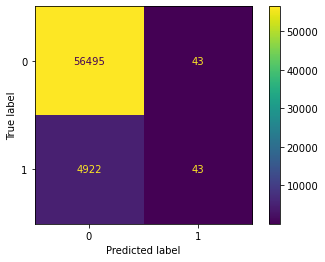

In [205]:
# plot confusion matrix
plot_confusion_matrix(logistic_clf, x_test, y_test)
plt.show()

In [206]:
# add accuracy score to results table
results.loc[0] = ['Logistic Regression', np.round(logistic_train_mean_accuracy_score*100, 2), np.round(logistic_test_score*100, 2), np.round(logistic_train_mean_roc_score*100, 2), np.round(logistic_test_roc_score*100, 2), logistic_grid_search.best_params_]

# show results
results

,model,Train Accuracy,Test Accuracy,Train Area under ROC,Test Area under ROC,Best Parameters
0,Logistic Regression,91.91,91.93,74.17,74.48,"{'logistic__C': 0.1, 'logistic__l1_ratio': 0.5}"


#### Feature Importance

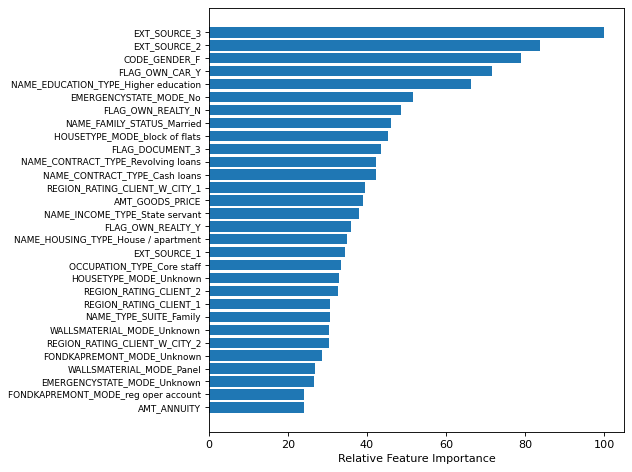

There are 35 features that have 0 importance.


In [284]:
# plot the feature importance
lr_feature_importance_plot(clf=logistic_clf, names=column_names, n=30)

### Regularized Logistic Regression w/ loan features

In [207]:
# fit best estimator on entire training data
loan_logistic_clf = loan_logistic_grid_search.best_estimator_.fit(x_train, y_train)

# generate predictions on test data
loan_logistic_predictions = loan_logistic_clf.predict(x_test)

# calculate score on test predictions
loan_logistic_test_score = accuracy_score(y_test, loan_logistic_predictions)

# calculate roc_auc score on test predictions
loan_logistic_test_roc_score = roc_auc_score(y_test, loan_logistic_clf.predict_proba(x_test)[:, 1])

# calculate classification report on test predictions
loan_logistic_test_classification_report = classification_report(y_test, loan_logistic_predictions)

# calculate confusion matrix on test predictions
loan_logistic_test_confusion_matrix = confusion_matrix(y_test, loan_logistic_predictions)

In [208]:
# display the classification report
print(loan_logistic_test_classification_report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.48      0.01      0.02      4965

    accuracy                           0.92     61503
   macro avg       0.70      0.50      0.49     61503
weighted avg       0.88      0.92      0.88     61503



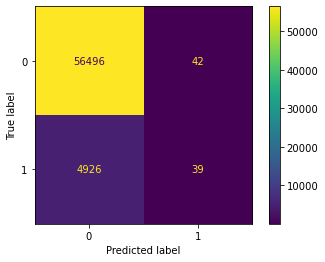

In [209]:
# plot confusion matrix
plot_confusion_matrix(loan_logistic_clf, x_test, y_test)
plt.show()

In [210]:
# add accuracy score to results table
results.loc[1] = ['Logistic Regression w/ loan features', np.round(loan_logistic_train_mean_accuracy_score*100, 2), np.round(loan_logistic_test_score*100, 2), np.round(loan_logistic_train_mean_roc_score*100, 2), np.round(loan_logistic_test_roc_score*100, 2), loan_logistic_grid_search.best_params_]

# show results
results

,model,Train Accuracy,Test Accuracy,Train Area under ROC,Test Area under ROC,Best Parameters
0,Logistic Regression,91.91,91.93,74.17,74.48,"{'logistic__C': 0.1, 'logistic__l1_ratio': 0.5}"
1,Logistic Regression w/ loan features,91.92,91.92,74.32,74.60,"{'logistic__C': 0.1, 'logistic__l1_ratio': 0.3}"


#### Feature Importance

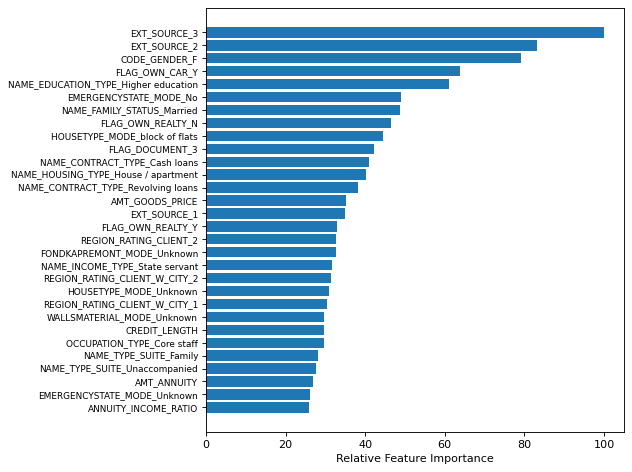

There are 20 features that have 0 importance.


In [283]:
# set the added column names
loan_column_names = numerical_features  + \
               list(data_pipeline.transformers_[1][1].named_steps["ohe"].get_feature_names(categorical_features))

# plot the feature importance
lr_feature_importance_plot(clf=loan_logistic_clf, names=loan_column_names, n=30)

### Random Forest w/ loan features

In [211]:
# fit best estimator on entire training data
rf_clf = rf_grid_search.best_estimator_.fit(x_train, y_train)

# generate predictions on test data
rf_predictions = rf_clf.predict(x_test)

# calculate score on test predictions
rf_test_score = accuracy_score(y_test, rf_predictions)

# calculate roc_auc score on test predictions
rf_test_roc_score = roc_auc_score(y_test, rf_clf.predict_proba(x_test)[:, 1])

# calculate classification report on test predictions
rf_test_classification_report = classification_report(y_test, rf_predictions)

# calculate confusion matrix on test predictions
rf_test_confusion_matrix = confusion_matrix(y_test, rf_predictions)

In [212]:
# display the classification report
print(rf_test_classification_report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.00      0.00      0.00      4965

    accuracy                           0.92     61503
   macro avg       0.46      0.50      0.48     61503
weighted avg       0.85      0.92      0.88     61503



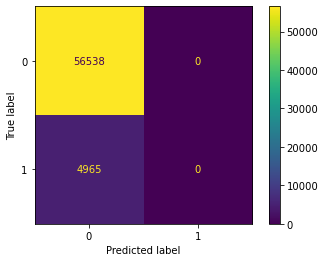

In [213]:
# plot confusion matrix
plot_confusion_matrix(rf_clf, x_test, y_test)
plt.show()

In [214]:
# add accuracy score to results table
results.loc[2] = ['Random Forest w/ loan features', np.round(rf_train_mean_accuracy_score*100, 2), np.round(rf_test_score*100, 2), np.round(rf_train_mean_roc_score*100, 2), np.round(rf_test_roc_score*100, 2), rf_grid_search.best_params_]

# show results
results

,model,Train Accuracy,Test Accuracy,Train Area under ROC,Test Area under ROC,Best Parameters
0,Logistic Regression,91.91,91.93,74.17,74.48,"{'logistic__C': 0.1, 'logistic__l1_ratio': 0.5}"
1,Logistic Regression w/ loan features,91.92,91.92,74.32,74.60,"{'logistic__C': 0.1, 'logistic__l1_ratio': 0.3}"
2,Random Forest w/ loan features,91.93,91.93,72.46,73.13,"{'rf__max_depth': 9, 'rf__max_features': 10, '..."


#### Feature Importance

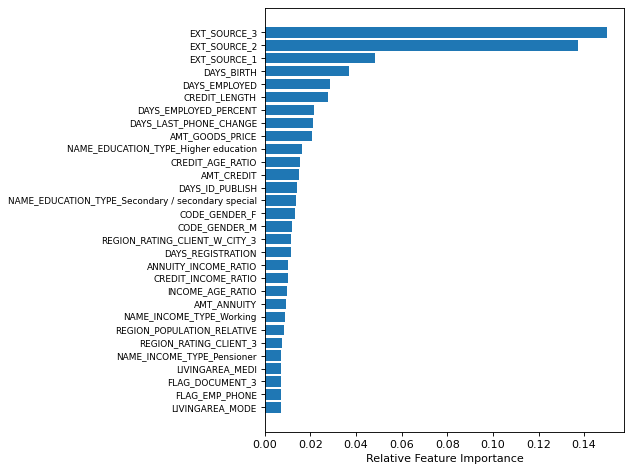

There are 20 features that have 0 importance.


In [282]:
# plot feature importance
tree_feature_importance_plot(clf=rf_clf, step_name='rf', names=loan_column_names, n=30)

### XGBoost w/ loan features

In [215]:
# fit best estimator on entire training data
xgb_clf = xgb_grid_search.best_estimator_.fit(x_train, y_train)

# generate predictions on test data
xgb_predictions = xgb_clf.predict(x_test)

# calculate score on test predictions
xgb_test_score = accuracy_score(y_test, xgb_predictions)

# calculate roc_auc score on test predictions
xgb_test_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(x_test)[:, 1])

# calculate classification report on test predictions
xgb_test_classification_report = classification_report(y_test, xgb_predictions)

# calculate confusion matrix on test predictions
xgb_test_confusion_matrix = confusion_matrix(y_test, xgb_predictions)

[05:00:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [216]:
# display the classification report
print(xgb_test_classification_report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.56      0.01      0.03      4965

    accuracy                           0.92     61503
   macro avg       0.74      0.51      0.49     61503
weighted avg       0.89      0.92      0.88     61503



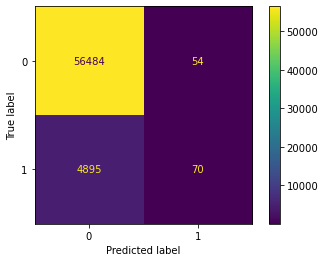

In [217]:
# plot confusion matrix
plot_confusion_matrix(xgb_clf, x_test, y_test)
plt.show()

In [218]:
# add accuracy score to results table
results.loc[3] = ['XGBoost w/ loan features', np.round(xgb_train_mean_accuracy_score*100, 2), np.round(xgb_test_score*100, 2), np.round(xgb_train_mean_roc_score*100, 2), np.round(xgb_test_roc_score*100, 2), xgb_grid_search.best_params_]

# show results
results

,model,Train Accuracy,Test Accuracy,Train Area under ROC,Test Area under ROC,Best Parameters
0,Logistic Regression,91.91,91.93,74.17,74.48,"{'logistic__C': 0.1, 'logistic__l1_ratio': 0.5}"
1,Logistic Regression w/ loan features,91.92,91.92,74.32,74.60,"{'logistic__C': 0.1, 'logistic__l1_ratio': 0.3}"
2,Random Forest w/ loan features,91.93,91.93,72.46,73.13,"{'rf__max_depth': 9, 'rf__max_features': 10, '..."
3,XGBoost w/ loan features,91.96,91.95,76.29,76.57,"{'xgb__colsample_bytree': 0.2, 'xgb__learning_..."


#### Feature Importance

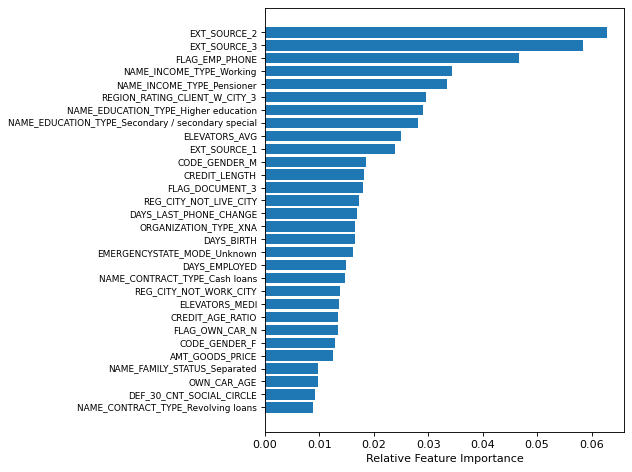

There are 156 features that have 0 importance.


In [280]:
# plot feature importance
tree_feature_importance_plot(clf=xgb_clf, step_name='xgb', names=loan_column_names, n=30)

# Results & Discussion

# Conclusion